<a href="https://colab.research.google.com/github/WELCOMEDATA/data_science/blob/main/telecom_chrun_case_study_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Churn Group Case Study
## Authors:  Kranthi Kumar Gandavaram

## Business Understanding
**In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.**

### Chrun Types:
1. **Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’
2. **Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time

### Three phases of customer behavior in telecom industry
1. The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual
2. The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months
3. The ‘churn’ phase: In this phase, the customer is said to have churned


# Case study is divided into 2 parts
## Part - 1: Customer Churn Prediction
## Part - 2: Identifying the strong Predictors of Churn

## Part - 1: In this part we will perfrom below steps:-
1. Data Loading and Understanding
2. Data Cleaning
3. Data Pre- Processing
4. Data Visualization and EDA
5. Model Building:
    * Handling Data Imbalance
    * Initial model building
    * Dimensionality reduction and feature selection using PCA    
    * Hyperparameter tuning
    * Model evaluation
    * Model selection

## 1. Data Loading and Understanding

In [ ]:
# Lets load all the libraries required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Lets import the libraries to build teh model and evaluate the models
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.metrics import sensitivity_specificity_support

pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 250)

In [ ]:
# lets load the data
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [ ]:
# lets check the shape of the telecom dataset
telecom.shape

(99999, 226)

Telecom data set has about 225 features and around 100K data entries

In [ ]:
# lets check the high level summary of the telecom data set
# as our data frame has 225 columns, we have pass verbose attribute
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 250)
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

From the info we got to know that most of the columns are of type int pr float, basically data set has many numeric variables

In [ ]:
# lets check the statistics of the telecom dataset
telecom.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

### Now that we have loaded the data and understood data types, its statistics and shape. Lets start the data cleaning

## 2. Data Cleaning

In [ ]:
# lets check the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [ ]:
# lets create list of columns related to same actions like total recharge in month
total_recharge = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [ ]:
# lets drop the column mobile no. and circle_id, as these columns does not add any value of the churn prediction
telecom.drop(['mobile_number','circle_id'], inplace=True, axis=1)
telecom.shape

(99999, 224)

In [ ]:
# lets drop the coulmns having same values for all records
# as the columns haveing single value are not useful in feature analysis to predict the result
telecom.drop(columns=telecom.columns[telecom.nunique()==1], inplace=True)
telecom.shape

(99999, 209)

In [ ]:
# lets impute the missing values in recharge column with '0',
# as the empty value in the recharge columns means customer has not recharged his phone numbe
telecom[total_recharge] = telecom[total_recharge].fillna(0)
# Lets check the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom)),2)

arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou_9             7.75
loc_og_t2f_mou_6             3.94
loc_og_t2f_mou

In [ ]:
# lets create the list for the categorical data type
cat_var = telecom.select_dtypes(include='object').columns
telecom[cat_var].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


It looks like all the columns of type category are related date. Lets go ahead and drop these columns

In [ ]:
# lets drop the all the date columns
telecom.drop(cat_var, inplace=True, axis=1)
telecom.shape

(99999, 201)

In [ ]:
# lets check the count of uniique values in the telecom dataset
for col in telecom.columns:
    print(col, len(telecom[col].unique()))

arpu_6 85681
arpu_7 85308
arpu_8 83615
arpu_9 79937
onnet_mou_6 24314
onnet_mou_7 24337
onnet_mou_8 24090
onnet_mou_9 23566
offnet_mou_6 31141
offnet_mou_7 31024
offnet_mou_8 30909
offnet_mou_9 30078
roam_ic_mou_6 6513
roam_ic_mou_7 5231
roam_ic_mou_8 5316
roam_ic_mou_9 4828
roam_og_mou_6 8039
roam_og_mou_7 6640
roam_og_mou_8 6505
roam_og_mou_9 5883
loc_og_t2t_mou_6 13540
loc_og_t2t_mou_7 13412
loc_og_t2t_mou_8 13337
loc_og_t2t_mou_9 12950
loc_og_t2m_mou_6 20906
loc_og_t2m_mou_7 20638
loc_og_t2m_mou_8 20545
loc_og_t2m_mou_9 20142
loc_og_t2f_mou_6 3861
loc_og_t2f_mou_7 3864
loc_og_t2f_mou_8 3808
loc_og_t2f_mou_9 3759
loc_og_t2c_mou_6 2236
loc_og_t2c_mou_7 2427
loc_og_t2c_mou_8 2517
loc_og_t2c_mou_9 2333
loc_og_mou_6 26373
loc_og_mou_7 26092
loc_og_mou_8 25991
loc_og_mou_9 25377
std_og_t2t_mou_6 18245
std_og_t2t_mou_7 18568
std_og_t2t_mou_8 18292
std_og_t2t_mou_9 17935
std_og_t2m_mou_6 19735
std_og_t2m_mou_7 20019
std_og_t2m_mou_8 19787
std_og_t2m_mou_9 19053
std_og_t2f_mou_6 2451
std_og

From the above result we can observe that:
- Some columns are less informative and dont add any value for the churn prediction

In [ ]:
# lets create the list for the night pack and FB users
night_fb_user = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
# lets impute the empty values of 'night_fb_user' with '2'
# where 2 will be new category
telecom[night_fb_user] = telecom[night_fb_user].fillna(2)

# lets change the data type of night_fb_user columns to category
telecom[night_fb_user] = telecom[night_fb_user].astype("category")
# Lets check the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom)),2)


arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6       3.94
loc_og_t2c_mou_7       3.86
loc_og_t2c_mou_8       5.38
loc_og_t2c_mou_9    

In [ ]:
# lets drop the columns with missing value more then threshold
thresh = len(telecom)*0.5
telecom.dropna(thresh= thresh, axis= 1, inplace = True)
print(telecom.shape)

(99999, 185)


In [ ]:
# lets check the count of missing values
df = telecom.isnull().sum().reset_index(name='missing_cnt')
df.loc[df['missing_cnt']>0].sort_values('missing_cnt', ascending=False)

,index,missing_cnt
119,ic_others_9,7745
95,std_ic_t2m_mou_9,7745
75,loc_ic_t2t_mou_9,7745
31,loc_og_t2f_mou_9,7745
79,loc_ic_t2m_mou_9,7745
63,spl_og_mou_9,7745
27,loc_og_t2m_mou_9,7745
83,loc_ic_t2f_mou_9,7745
47,std_og_t2m_mou_9,7745
87,loc_ic_mou_9,7745


From the above result we can see that there are still many columns which have empty values, and we have to impute the values

In [ ]:
# lets imput all the missing values with '0', assuming that empty means person has not used the particular feature
telecom = telecom.fillna(value=0)
# Lets check the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom)),2)

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8

## 3. Data Pre- Processing

### Lets filter the high value customers based on the revinue generated

In [ ]:
# lets claculatew the total recharge per month including normal recharge and data recharge
telecom['total_rech_amount_6'] = (telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']) + telecom['total_rech_amt_6']
telecom['total_rech_amount_7'] = (telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']) + telecom['total_rech_amt_7']

# lets calculate the average recharge done in month 6 and 7

telecom['avg_rech_amt_67'] = (telecom['total_rech_amount_6'] + telecom['total_rech_amount_7'])/2

In [ ]:
# lets calculate the 70th percentice value of the average recharge amount to filter high value customers
print('The 70th percentice of the avg recharge amount: {0}'.format(telecom['avg_rech_amt_67'].quantile(0.7)))

The 70th percentice of the avg recharge amount: 478.0


In [ ]:
# lets drop the data entries with avg_rech_amt_67 < 478 and store the data in new data frame
high_value_cust = telecom.loc[ telecom['avg_rech_amt_67'] >= telecom['avg_rech_amt_67'].quantile(0.7),:]
high_value_cust = high_value_cust.reset_index(drop = True)
high_value_cust.shape

(30001, 188)

In [ ]:
# lets drop the recharge, data recharge and average recharge amount columns from high_value_cust
high_value_cust = high_value_cust.drop(['av_rech_amt_data_6','av_rech_amt_data_7','avg_rech_amt_67'], axis=1)
high_value_cust.shape

(30001, 185)

### Lets derive the churn variable by checking the data of september month

In [ ]:
# lets create list for the columns for identifying the churn
churn_col = ['total_ic_mou_9', 'total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

In [ ]:
# lets apply a lambda function to create churn variable:
# if sep_total_calls and sep_total_data are '0', that means customer has churned out else no
high_value_cust['churn'] = np.where(high_value_cust[churn_col].sum(axis=1) == 0, 1, 0 )
high_value_cust.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6,total_rech_amount_7,churn
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,2.0,968,30.40,0.00,101.20,3.58,614.0,504.0,1
1,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.0,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121

In [ ]:
# lets change the data type of the churn column to category
high_value_cust.churn = high_value_cust.churn.astype("category")

# lets check the count of chred out customers
high_value_cust.churn.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [ ]:
# lets calculate the churn rate
print('Churn Rate : {0}%'.format(round(((sum(high_value_cust['churn'])/len(high_value_cust['churn']))*100),2)))

Churn Rate : 8.14%


### Lets drop all the variables/ columns related to sept month

In [ ]:
# lets drop the features associated with sept month using regrex
high_value_cust = high_value_cust.filter(regex='[^9]$', axis=1)
high_value_cust.shape

(30001, 141)

### Lets calculate the drop in usage and revenue at the action phase. i.e. difference in usage/revenue in Aug month compared to avg usage/revenue in June and July month

In [ ]:
# lets find the drop of values in usage or revenue in action phase
high_value_cust['arpu_drop'] = ((high_value_cust['arpu_6'] + high_value_cust['arpu_7'])/2) - high_value_cust['arpu_8']
high_value_cust['onnet_mou_drop'] = ((high_value_cust['onnet_mou_6'] + high_value_cust['onnet_mou_7'])/2) - high_value_cust['onnet_mou_8']
high_value_cust['offnet_mou_drop'] = ((high_value_cust['offnet_mou_6'] + high_value_cust['offnet_mou_7'])/2) - high_value_cust['offnet_mou_8']

high_value_cust['roam_ic_mou_drop'] = ((high_value_cust['roam_ic_mou_6'] + high_value_cust['roam_ic_mou_7'])/2) - high_value_cust['roam_ic_mou_8']
high_value_cust['roam_og_mou_drop'] = ((high_value_cust['roam_og_mou_6'] + high_value_cust['roam_og_mou_7'])/2) - high_value_cust['roam_og_mou_8']

high_value_cust['loc_og_t2t_mou_drop'] = ((high_value_cust['loc_og_t2t_mou_6'] + high_value_cust['loc_og_t2t_mou_7'])/2) - high_value_cust['loc_og_t2t_mou_8']
high_value_cust['loc_og_t2m_mou_drop'] = ((high_value_cust['loc_og_t2m_mou_6'] + high_value_cust['loc_og_t2m_mou_7'])/2) - high_value_cust['loc_og_t2m_mou_8']
high_value_cust['loc_og_t2f_mou_drop'] = ((high_value_cust['loc_og_t2f_mou_6'] + high_value_cust['loc_og_t2f_mou_7'])/2) - high_value_cust['loc_og_t2f_mou_8']
high_value_cust['loc_og_t2c_mou_drop'] = ((high_value_cust['loc_og_t2c_mou_6'] + high_value_cust['loc_og_t2c_mou_7'])/2) - high_value_cust['loc_og_t2c_mou_8']
high_value_cust['loc_og_mou_drop'] = ((high_value_cust['loc_og_mou_6'] + high_value_cust['loc_og_mou_7'])/2) - high_value_cust['loc_og_mou_8']

high_value_cust['std_og_t2t_mou_drop'] = ((high_value_cust['std_og_t2t_mou_6'] + high_value_cust['std_og_t2t_mou_7'])/2) - high_value_cust['std_og_t2t_mou_8']

high_value_cust['isd_og_mou_drop'] = ((high_value_cust['isd_og_mou_6'] + high_value_cust['isd_og_mou_7'])/2) - high_value_cust['isd_og_mou_8']
high_value_cust['spl_og_mou_drop'] = ((high_value_cust['spl_og_mou_6'] + high_value_cust['spl_og_mou_7'])/2) - high_value_cust['spl_og_mou_8']
high_value_cust['og_others_drop'] = ((high_value_cust['og_others_6'] + high_value_cust['og_others_7'])/2) - high_value_cust['og_others_8']
high_value_cust['total_og_mou_drop'] = ((high_value_cust['total_og_mou_6'] + high_value_cust['total_og_mou_7'])/2) - high_value_cust['total_og_mou_8']

high_value_cust['loc_ic_t2t_mou_drop'] = ((high_value_cust['loc_ic_t2t_mou_6'] + high_value_cust['loc_ic_t2t_mou_7'])/2) - high_value_cust['loc_ic_t2t_mou_8']
high_value_cust['loc_ic_t2m_mou_drop'] = ((high_value_cust['loc_ic_t2m_mou_6'] + high_value_cust['loc_ic_t2m_mou_7'])/2) - high_value_cust['loc_ic_t2m_mou_8']
high_value_cust['loc_ic_t2f_mou_drop'] = ((high_value_cust['loc_ic_t2f_mou_6'] + high_value_cust['loc_ic_t2f_mou_7'])/2) - high_value_cust['loc_ic_t2f_mou_8']
high_value_cust['loc_ic_mou_drop'] = ((high_value_cust['loc_ic_mou_6'] + high_value_cust['loc_ic_mou_7'])/2) - high_value_cust['loc_ic_mou_8']

high_value_cust['std_ic_t2t_mou_drop'] = ((high_value_cust['std_ic_t2t_mou_6'] + high_value_cust['std_ic_t2t_mou_7'])/2) - high_value_cust['std_ic_t2t_mou_8']

high_value_cust['total_ic_mou_drop'] = ((high_value_cust['total_ic_mou_6'] + high_value_cust['total_ic_mou_7'])/2) - high_value_cust['total_ic_mou_8']
high_value_cust['spl_ic_mou_drop'] = ((high_value_cust['spl_ic_mou_6'] + high_value_cust['spl_ic_mou_7'])/2) - high_value_cust['spl_ic_mou_8']
high_value_cust['isd_ic_mou_drop'] = ((high_value_cust['isd_ic_mou_6'] + high_value_cust['isd_ic_mou_7'])/2) - high_value_cust['isd_ic_mou_8']
high_value_cust['ic_others_drop'] = ((high_value_cust['ic_others_6'] + high_value_cust['ic_others_7'])/2) - high_value_cust['ic_others_8']

high_value_cust['total_rech_num_drop'] = ((high_value_cust['total_rech_num_6'] + high_value_cust['total_rech_num_7'])/2) - high_value_cust['total_rech_num_8']
high_value_cust['total_rech_amt_drop'] = ((high_value_cust['total_rech_amt_6'] + high_value_cust['total_rech_amt_7'])/2) - high_value_cust['total_rech_amt_8']
high_value_cust['max_rech_amt_drop'] = ((high_value_cust['max_rech_amt_6'] + high_value_cust['max_rech_amt_7'])/2) - high_value_cust['max_rech_amt_8']
high_value_cust['last_day_rch_amt_drop'] = ((high_value_cust['last_day_rch_amt_6'] + high_value_cust['last_day_rch_amt_7'])/2) - high_value_cust['last_day_rch_amt_8']
high_value_cust['max_rech_data_drop'] = ((high_value_cust['max_rech_data_6'] + high_value_cust['max_rech_data_7'])/2) - high_value_cust['max_rech_data_8']


high_value_cust['vol_2g_mb_drop'] = ((high_value_cust['vol_2g_mb_6'] + high_value_cust['vol_2g_mb_7'])/2) - high_value_cust['vol_2g_mb_8']
high_value_cust['vol_3g_mb_drop'] = ((high_value_cust['vol_3g_mb_6'] + high_value_cust['vol_3g_mb_7'])/2) - high_value_cust['vol_3g_mb_8']


high_value_cust['monthly_2g_drop'] = ((high_value_cust['monthly_2g_6'] + high_value_cust['monthly_2g_7'])/2) - high_value_cust['monthly_2g_8']
high_value_cust['sachet_2g_drop'] = ((high_value_cust['sachet_2g_6'] + high_value_cust['sachet_2g_7'])/2) - high_value_cust['sachet_2g_8']

high_value_cust['monthly_3g_drop'] = ((high_value_cust['monthly_3g_6'] + high_value_cust['monthly_3g_7'])/2) - high_value_cust['monthly_3g_8']
high_value_cust['sachet_3g_drop'] = ((high_value_cust['sachet_3g_6'] + high_value_cust['sachet_3g_7'])/2) - high_value_cust['sachet_3g_8']

high_value_cust['drop_vbc_3g'] = ((high_value_cust['jul_vbc_3g'] + high_value_cust['jun_vbc_3g'])/2) - high_value_cust['aug_vbc_3g']


In [ ]:
# lets check the summary of final data frame
high_value_cust.describe(include='all')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6,total_rech_amount_7,churn,arpu_drop,onnet_mou_drop,offnet_mou_drop,roam_ic_mou_drop,roam_og_mou_drop,loc_og_t2t_mou_drop,loc_og_t2m_mou_drop,loc_og_t2f_mou_drop,loc_og_t2c_mou_drop,loc_og_mou_drop,std_og_t2t_mou_drop,isd_og_mou_drop,spl_og_mou_drop,og_others_drop,total_og_mou_drop,loc_ic_t2t_mou_drop,loc_ic_t2m_mou_drop,loc_ic_t2f_mou_drop,loc_ic_mou_drop,std_ic_t2t_mou_drop,total_ic_mou_drop,spl_ic_mou_drop,isd_ic_mou_drop,ic_others_drop,total_rech_num_drop,total_rech_amt_drop,max_rech_amt_drop,last_day_rch_amt_drop,max_rech_data_drop,vol_2g_mb_drop,vol_3g_mb_drop,monthly_2g_drop,sachet_2g_drop,monthly_3g_drop,sachet_3g_drop,drop_vbc_3g
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000

In [ ]:
# lets check the size of final data frame
high_value_cust.shape

(30001, 177)

## 4. Data Visualization and EDA

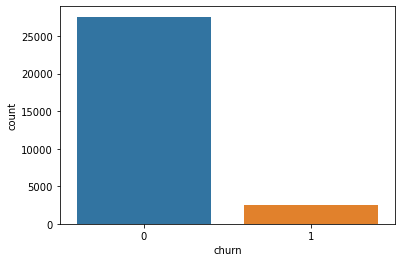

In [ ]:
# Lets plot the counter plot of the churn data
sns.countplot(x = 'churn', data = high_value_cust)
plt.show()

**Observation:** We can see from the above plot the data is imbalanced and we have to handel the imbalanced data using some techniques

In [ ]:
# lets convert the age of network 'aon' in years
high_value_cust['aon'] = round(high_value_cust['aon']/365,1)
high_value_cust.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6,total_rech_amount_7,churn,arpu_drop,onnet_mou_drop,offnet_mou_drop,roam_ic_mou_drop,roam_og_mou_drop,loc_og_t2t_mou_drop,loc_og_t2m_mou_drop,loc_og_t2f_mou_drop,loc_og_t2c_mou_drop,loc_og_mou_drop,std_og_t2t_mou_drop,isd_og_mou_drop,spl_og_mou_drop,og_others_drop,total_og_mou_drop,loc_ic_t2t_mou_drop,loc_ic_t2m_mou_drop,loc_ic_t2f_mou_drop,loc_ic_mou_drop,std_ic_t2t_mou_drop,total_ic_mou_drop,spl_ic_mou_drop,isd_ic_mou_drop,ic_others_drop,total_rech_num_drop,total_rech_amt_drop,max_rech_amt_drop,last_day_rch_amt_drop,max_rech_data_drop,vol_2g_mb_drop,vol_3g_mb_drop,monthly_2g_drop,sachet_2g_drop,monthly_3g_drop,sachet_3g_drop,drop_vbc_3g
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,2.7,30.40,0.00,101.20,3.58,614.0,504.0,1,-7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.00,0.0,0.000,-0.160,-4.130,-1.150,-5.440,0.000,-5.440,0.000,0.000,0.000,1.5,55.0,0.0,0.0,0.0,9.975,7.555,0.0,0.0,0.0,0.0,20.200
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,62

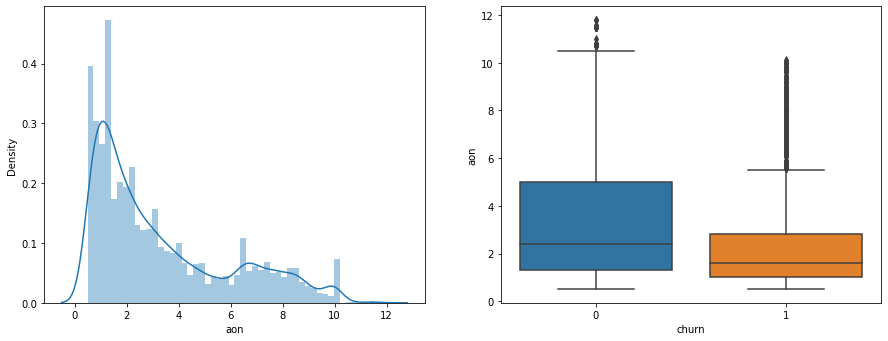

In [ ]:
# lets plot the distribution plot and box plof the age og network to check the churn variation across different aon

plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
sns.distplot(high_value_cust['aon'])

plt.subplot(2,2,2)
sns.boxplot(high_value_cust['churn'],high_value_cust['aon'])
plt.show()

**Observation:**
1. The age of network distribution is high in the region of 1 to 3
2. Churn rate seems to high for age of n/w with values 1-2

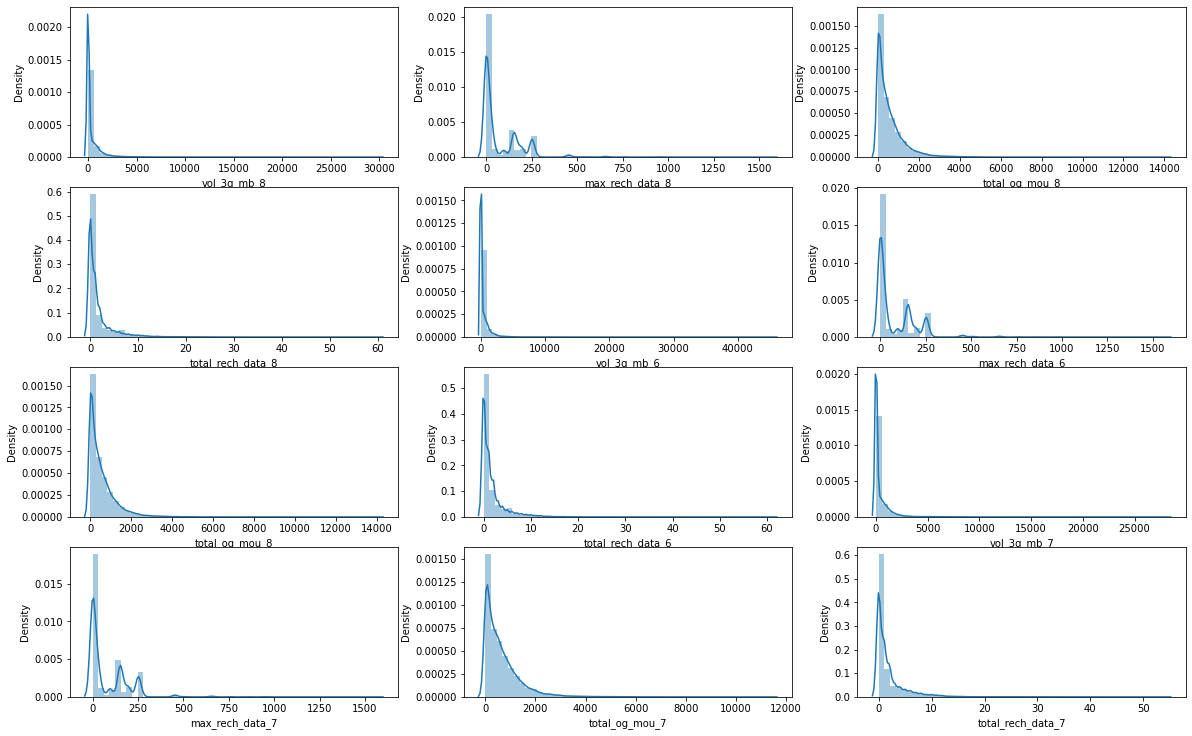

In [ ]:
# lets plot distribution of some features
plt.figure(figsize=(20, 16))
plt.subplot(5,3,1)
sns.distplot(high_value_cust['vol_3g_mb_8'])

plt.subplot(5,3,2)
sns.distplot(high_value_cust['max_rech_data_8'])

plt.subplot(5,3,3)
sns.distplot(high_value_cust['total_og_mou_8'])

plt.subplot(5,3,4)
sns.distplot(high_value_cust['total_rech_data_8'])

plt.subplot(5,3,5)
sns.distplot(high_value_cust['vol_3g_mb_6'])

plt.subplot(5,3,6)
sns.distplot(high_value_cust['max_rech_data_6'])

plt.subplot(5,3,7)
sns.distplot(high_value_cust['total_og_mou_8'])

plt.subplot(5,3,8)
sns.distplot(high_value_cust['total_rech_data_6'])

plt.subplot(5,3,9)
sns.distplot(high_value_cust['vol_3g_mb_7'])

plt.subplot(5,3,10)
sns.distplot(high_value_cust['max_rech_data_7'])

plt.subplot(5,3,11)
sns.distplot(high_value_cust['total_og_mou_7'])

plt.subplot(5,3,12)
sns.distplot(high_value_cust['total_rech_data_7'])

plt.show()

**Observation:** It looks like all the values are left skewed

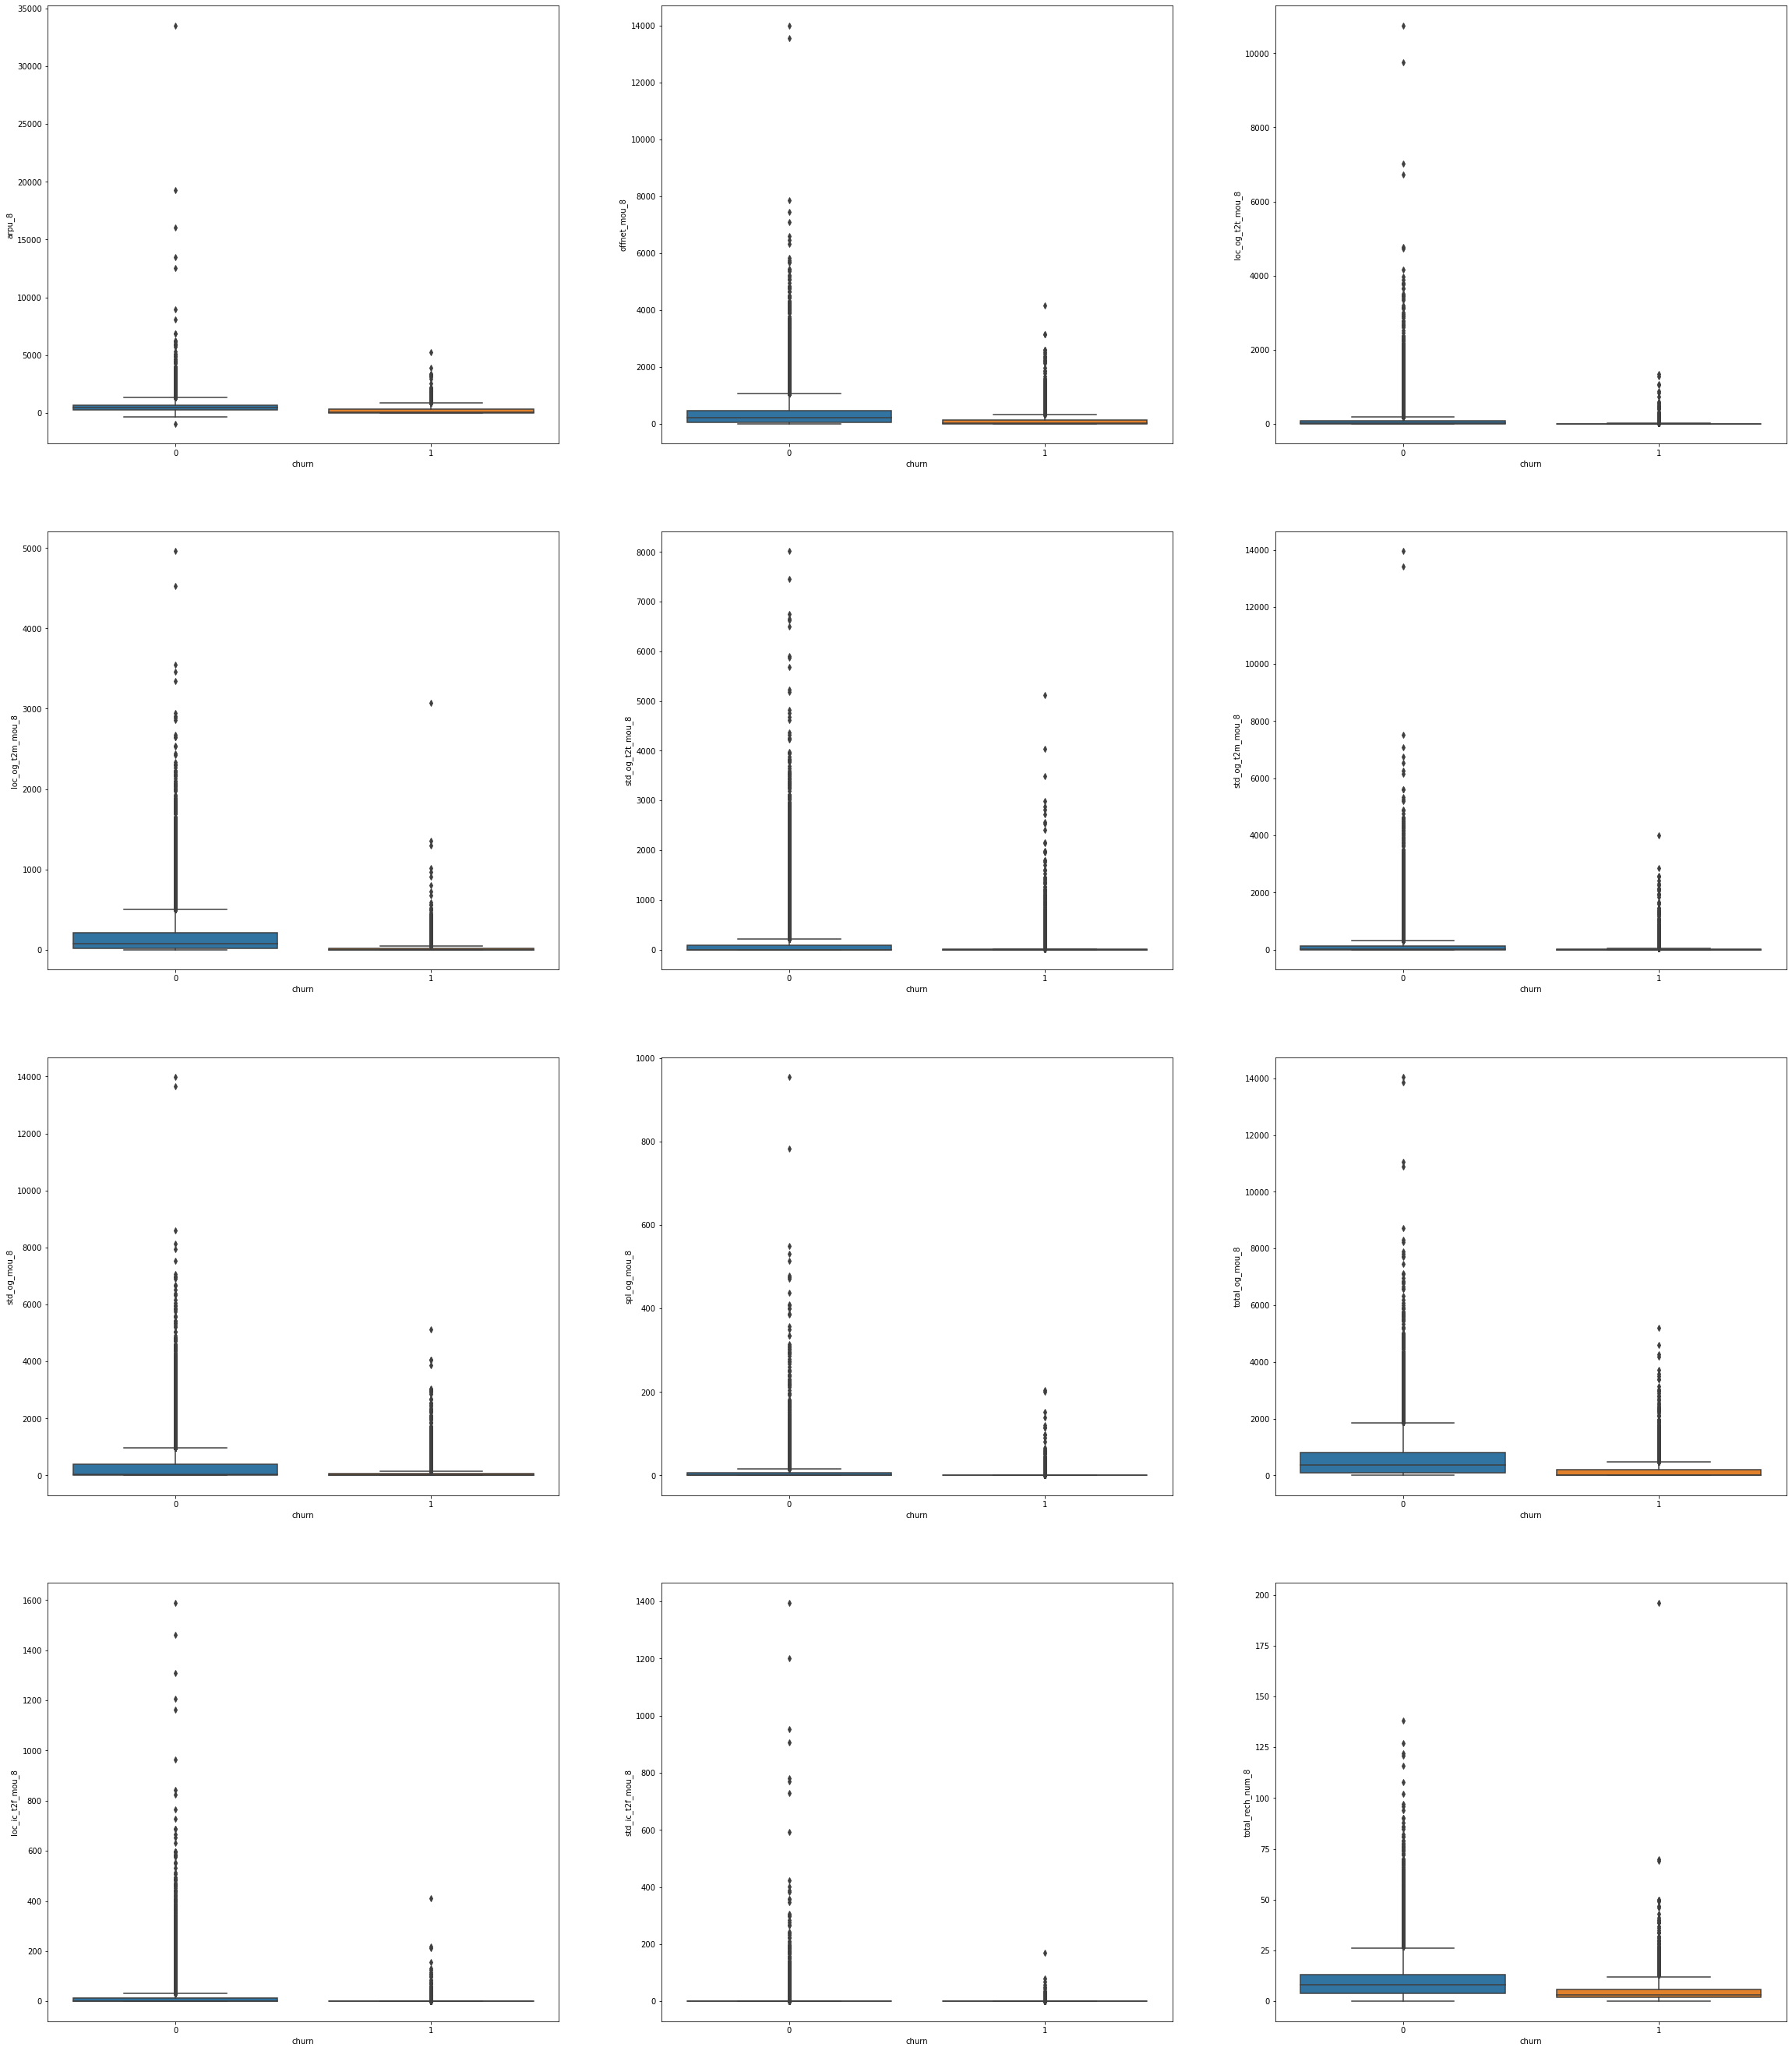

In [ ]:
# lets plot some box plots to check for outliers
plt.figure(figsize=(40, 60))
plt.subplot(5,3,1)
sns.boxplot(high_value_cust['churn'],high_value_cust['arpu_8'])

plt.subplot(5,3,2)
sns.boxplot(high_value_cust['churn'],high_value_cust['offnet_mou_8'])

plt.subplot(5,3,3)
sns.boxplot(high_value_cust['churn'],high_value_cust['loc_og_t2t_mou_8'])

plt.subplot(5,3,4)
sns.boxplot(high_value_cust['churn'],high_value_cust['loc_og_t2m_mou_8'])

plt.subplot(5,3,5)
sns.boxplot(high_value_cust['churn'],high_value_cust['std_og_t2t_mou_8'])

plt.subplot(5,3,6)
sns.boxplot(high_value_cust['churn'],high_value_cust['std_og_t2m_mou_8'])

plt.subplot(5,3,7)
sns.boxplot(high_value_cust['churn'],high_value_cust['std_og_mou_8'])

plt.subplot(5,3,8)
sns.boxplot(high_value_cust['churn'],high_value_cust['spl_og_mou_8'])

plt.subplot(5,3,9)
sns.boxplot(high_value_cust['churn'],high_value_cust['total_og_mou_8'])

plt.subplot(5,3,10)
sns.boxplot(high_value_cust['churn'],high_value_cust['loc_ic_t2f_mou_8'])

plt.subplot(5,3,11)
sns.boxplot(high_value_cust['churn'],high_value_cust['std_ic_t2f_mou_8'])

plt.subplot(5,3,12)
sns.boxplot(high_value_cust['churn'],high_value_cust['total_rech_num_8'])

plt.show()

**Observation:** From teh above boxplots we can see that many features are having outliers

### Outliear treatment

In [ ]:
# Lets create list for numeric data type columns
num_col = high_value_cust.select_dtypes(include=np.number).columns

In [ ]:
# lets cap the outliers using clip function
for col in high_value_cust[num_col]:
    percentiles = high_value_cust[col].quantile([0.05,0.95]).values
    high_value_cust[col] = np.clip(high_value_cust[col], percentiles[0], percentiles[1])

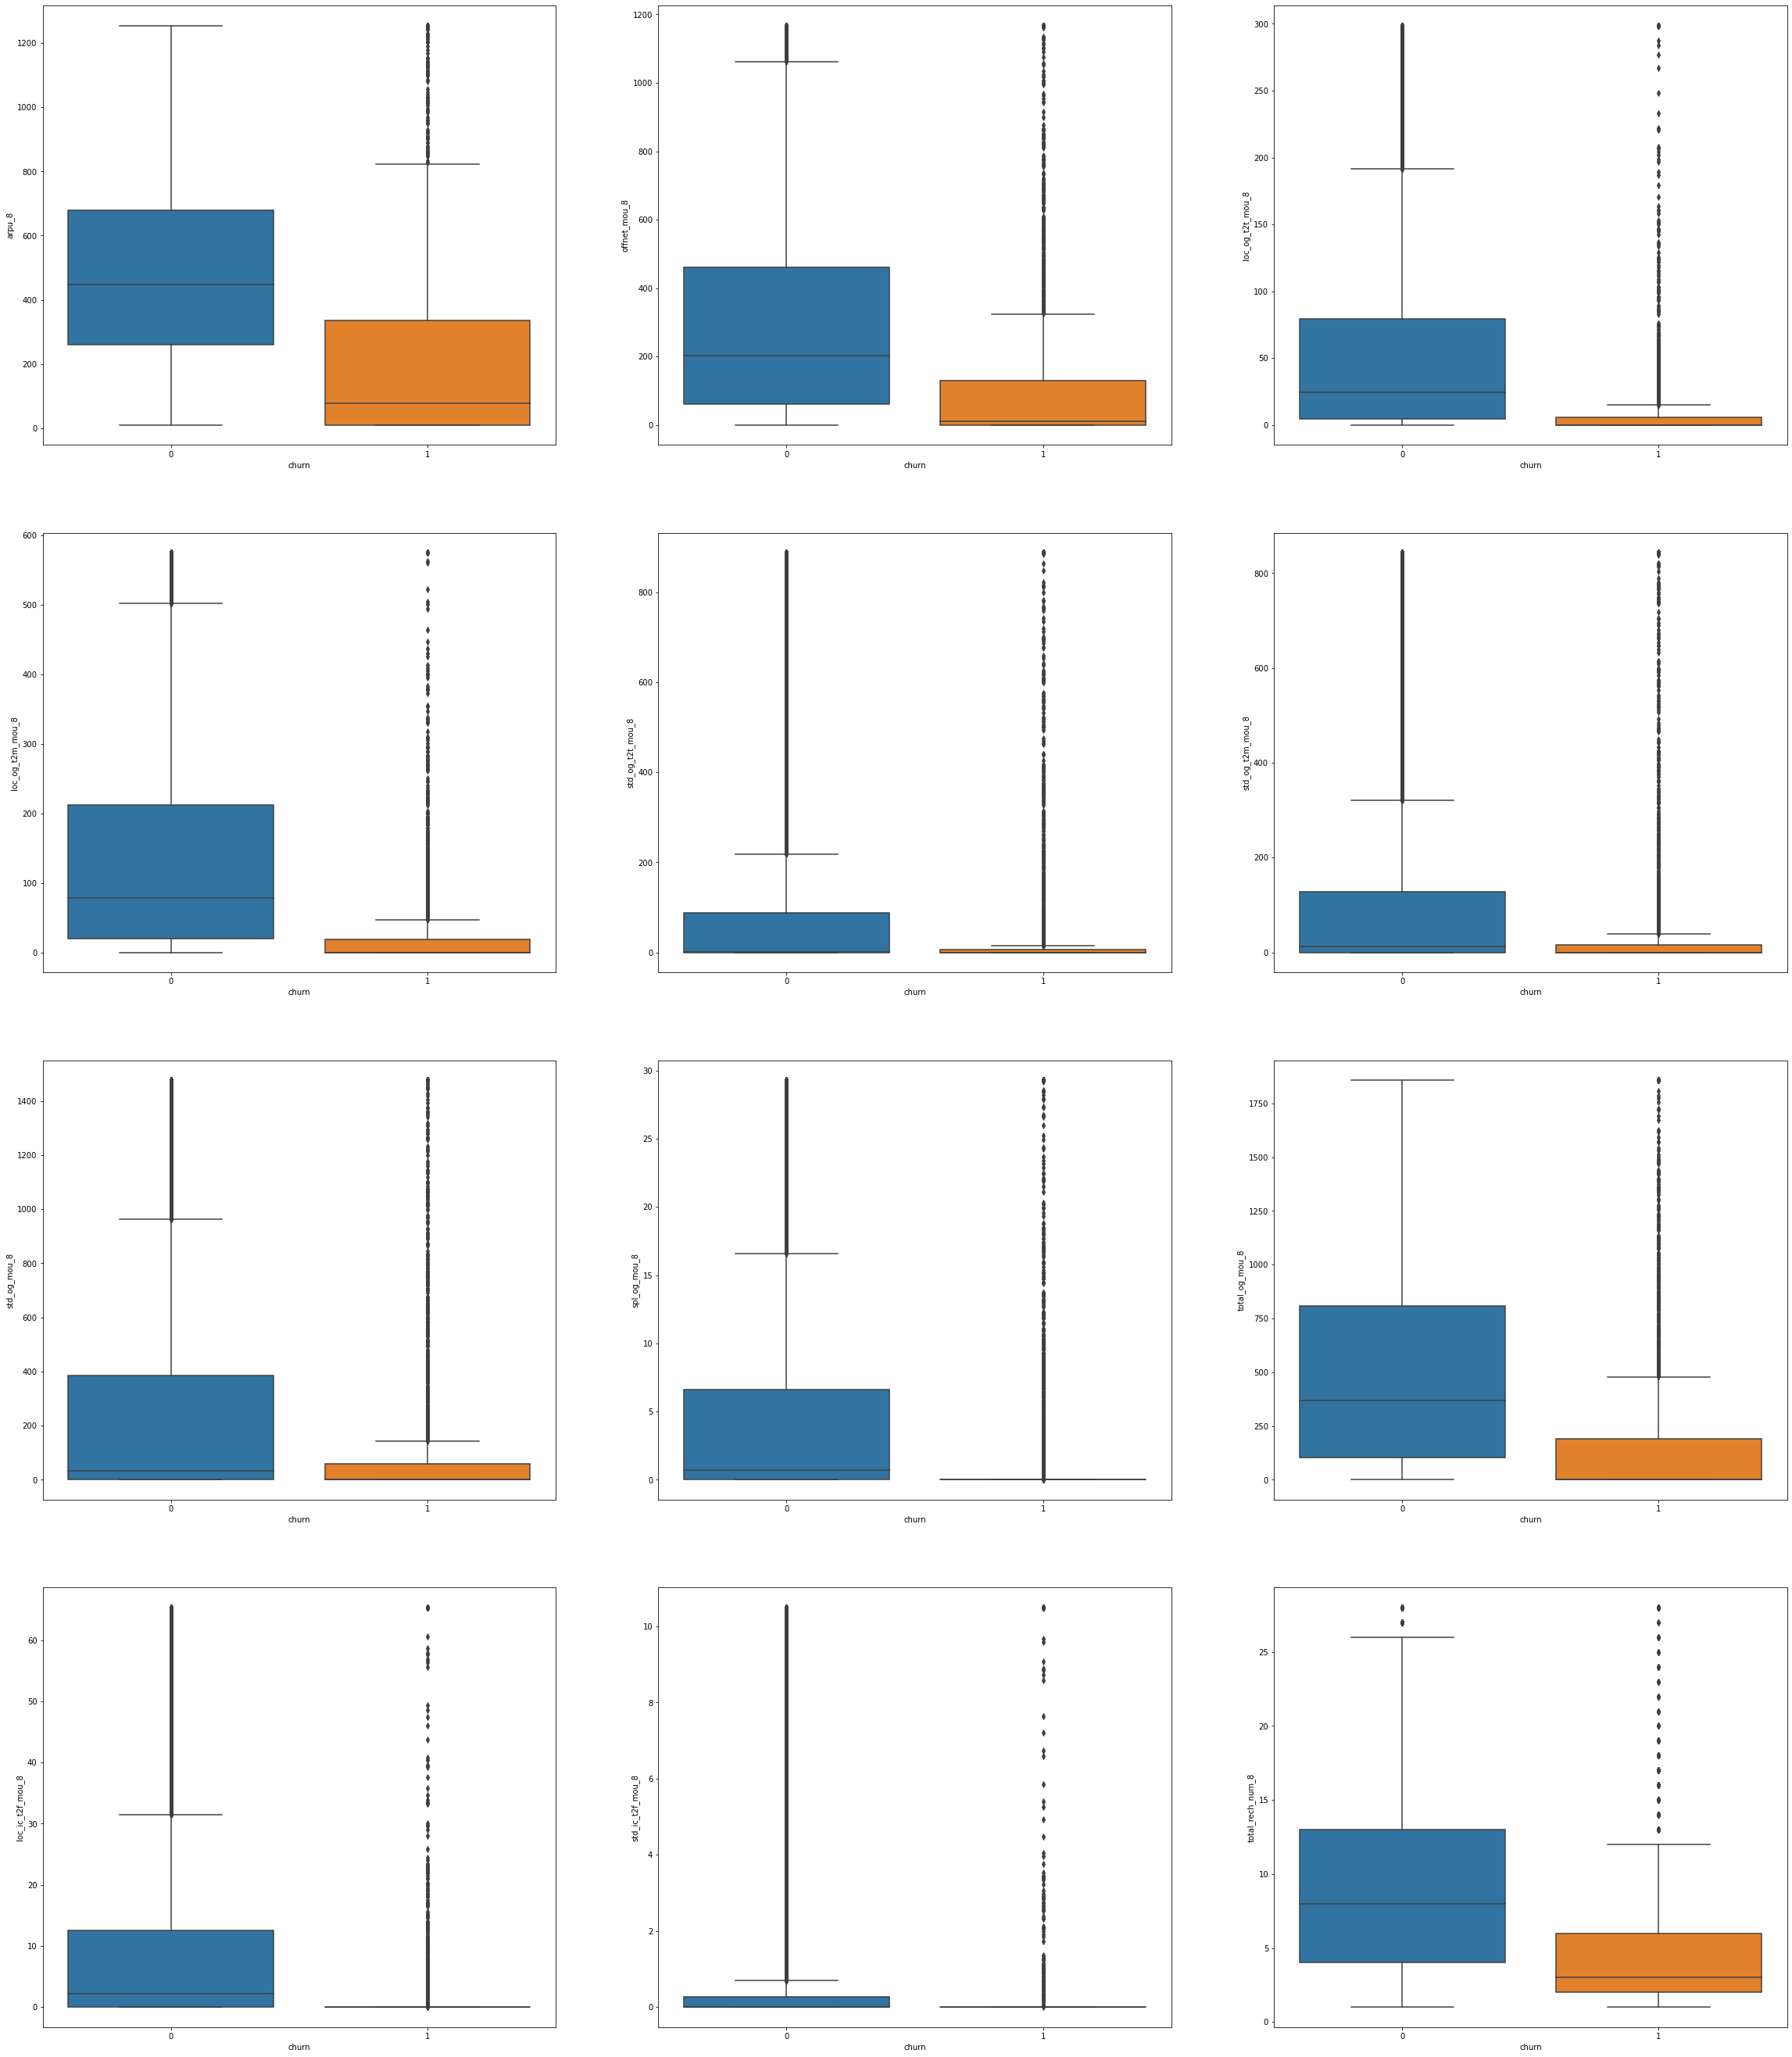

In [ ]:
# lets plot some box plots after outliear treatment
plt.figure(figsize=(40, 60))
plt.subplot(5,3,1)
sns.boxplot(high_value_cust['churn'],high_value_cust['arpu_8'])

plt.subplot(5,3,2)
sns.boxplot(high_value_cust['churn'],high_value_cust['offnet_mou_8'])

plt.subplot(5,3,3)
sns.boxplot(high_value_cust['churn'],high_value_cust['loc_og_t2t_mou_8'])

plt.subplot(5,3,4)
sns.boxplot(high_value_cust['churn'],high_value_cust['loc_og_t2m_mou_8'])

plt.subplot(5,3,5)
sns.boxplot(high_value_cust['churn'],high_value_cust['std_og_t2t_mou_8'])

plt.subplot(5,3,6)
sns.boxplot(high_value_cust['churn'],high_value_cust['std_og_t2m_mou_8'])

plt.subplot(5,3,7)
sns.boxplot(high_value_cust['churn'],high_value_cust['std_og_mou_8'])

plt.subplot(5,3,8)
sns.boxplot(high_value_cust['churn'],high_value_cust['spl_og_mou_8'])

plt.subplot(5,3,9)
sns.boxplot(high_value_cust['churn'],high_value_cust['total_og_mou_8'])

plt.subplot(5,3,10)
sns.boxplot(high_value_cust['churn'],high_value_cust['loc_ic_t2f_mou_8'])

plt.subplot(5,3,11)
sns.boxplot(high_value_cust['churn'],high_value_cust['std_ic_t2f_mou_8'])

plt.subplot(5,3,12)
sns.boxplot(high_value_cust['churn'],high_value_cust['total_rech_num_8'])

plt.show()

## 5. Model Building

In [ ]:
# Lets see the head of data set
high_value_cust.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6,total_rech_amount_7,churn,arpu_drop,onnet_mou_drop,offnet_mou_drop,roam_ic_mou_drop,roam_og_mou_drop,loc_og_t2t_mou_drop,loc_og_t2m_mou_drop,loc_og_t2f_mou_drop,loc_og_t2c_mou_drop,loc_og_mou_drop,std_og_t2t_mou_drop,isd_og_mou_drop,spl_og_mou_drop,og_others_drop,total_og_mou_drop,loc_ic_t2t_mou_drop,loc_ic_t2m_mou_drop,loc_ic_t2f_mou_drop,loc_ic_mou_drop,std_ic_t2t_mou_drop,total_ic_mou_drop,spl_ic_mou_drop,isd_ic_mou_drop,ic_others_drop,total_rech_num_drop,total_rech_amt_drop,max_rech_amt_drop,last_day_rch_amt_drop,max_rech_data_drop,vol_2g_mb_drop,vol_3g_mb_drop,monthly_2g_drop,sachet_2g_drop,monthly_3g_drop,sachet_3g_drop,drop_vbc_3g
0,197.385,214.816,213.803,0.00,0.00,0.00,0.21,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.31,4.13,0.00,0.00,1.15,0.56,1.15,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.26,2.44,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,2.7,30.40,0.00,101.20,3.58,614.0,504.0,1,-7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,-0.160,-4.130,-1.150,-5.440,0.000,-5.440,0.000,0.000,0.000,1.5,55.0,0.0,0.0,0.0,9.975,7.555,0.0,0.0,0.0,0.0,20.200
1,1069.180,1261.272,1255.019,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,30.43,31.13,28.39,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,6.68,5.93,60.86,75.14,77.84,0.0,0.18,0.36,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,71.56,73.34,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,122.09,114.08,11.18,11.53,10.49,180.54,173.08,181.08,626.46

### Dummy variable creation for the categorical variables

In [ ]:
# Lets change the data type of the dependent variable
high_value_cust['churn'] = pd.to_numeric(high_value_cust['churn'])
# lets create list for the categorical variables
cat_columns = high_value_cust.select_dtypes(include='category').columns
high_value_cust[cat_columns].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,0.0,0.0,0.0,1.0,1.0,1.0
1,2.0,2.0,2.0,2.0,2.0,2.0
2,2.0,0.0,0.0,2.0,1.0,1.0
3,2.0,2.0,2.0,2.0,2.0,2.0
4,2.0,0.0,0.0,2.0,1.0,1.0


In [ ]:
# Lets create dummy variable for the categorical valiables
high_value_cust = pd.concat([high_value_cust,pd.get_dummies(high_value_cust[cat_columns], drop_first=True)], axis=1)

# drop the original columns
high_value_cust.drop(cat_columns, axis=1, inplace=True)

# Lets check the shape of data frame
high_value_cust.shape

(30001, 183)

In [ ]:
# lets split the data set into X and y
X = high_value_cust.drop("churn", axis = 1)
y = high_value_cust.churn

## Handling Class imbalance using Smote

Since the churn rate is <10% we must handle the class imbalance for getting more accurate and correct predictions
Class imbalance is a common problem in many business domains:
1. Fraud detection
2. Email spam detection
3. Disease screening

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce errors.

However, if the data set in imbalance then In such cases, you get a pretty high accuracy just by predicting the majority class, but you fail to capture the minority class, which is most often the point of creating the model in the first place.

resources:
(https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
(https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html)

In [ ]:
# Lets see the head of data set
high_value_cust.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6,total_rech_amount_7,churn,arpu_drop,onnet_mou_drop,offnet_mou_drop,roam_ic_mou_drop,roam_og_mou_drop,loc_og_t2t_mou_drop,loc_og_t2m_mou_drop,loc_og_t2f_mou_drop,loc_og_t2c_mou_drop,loc_og_mou_drop,std_og_t2t_mou_drop,isd_og_mou_drop,spl_og_mou_drop,og_others_drop,total_og_mou_drop,loc_ic_t2t_mou_drop,loc_ic_t2m_mou_drop,loc_ic_t2f_mou_drop,loc_ic_mou_drop,std_ic_t2t_mou_drop,total_ic_mou_drop,spl_ic_mou_drop,isd_ic_mou_drop,ic_others_drop,total_rech_num_drop,total_rech_amt_drop,max_rech_amt_drop,last_day_rch_amt_drop,max_rech_data_drop,vol_2g_mb_drop,vol_3g_mb_drop,monthly_2g_drop,sachet_2g_drop,monthly_3g_drop,sachet_3g_drop,drop_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_2.0,night_pck_user_7_1.0,night_pck_user_7_2.0,night_pck_user_8_1.0,night_pck_user_8_2.0,fb_user_6_1.0,fb_user_6_2.0,fb_user_7_1.0,fb_user_7_2.0,fb_user_8_1.0,fb_user_8_2.0
0,197.385,214.816,213.803,0.00,0.00,0.00,0.21,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.31,4.13,0.00,0.00,1.15,0.56,1.15,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.26,2.44,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,2.7,30.40,0.00,101.20,3.58,614.0,504.0,1,-7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,-0.160,-4.130,-1.150,-5.440,0.000,-5.440,0.000,0.000,0.000,1.5,55.0,0.0,0.0,0.0,9.975,7.555,0.0,0.0,0.0,0.0,20.200,0,0,0,0,0,0,1,0,1,0,1,0
1,1069.180,1261.272,1255.019,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,30.43,31.13,28.39,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,6.68,5.93,60.86,75.14,77.84,0.0,0.18,0.36,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,

In [ ]:
# lets import library to handle data imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
# fit predictor and target variable
from collections import Counter
x_smote, y_smote = smote.fit_resample(X, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 27560, 1: 2441})
Resample dataset shape Counter({1: 27560, 0: 27560})


In [ ]:
# lets split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.25, random_state = 42, stratify = y_smote)

In [ ]:
# Lets print the shape of train and test datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(41340, 182)
(41340,)
(13780, 182)
(13780,)


In [ ]:
# lets check the ratio of churn in y_test and y_train
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))

1    0.5
0    0.5
Name: churn, dtype: float64
1    0.5
0    0.5
Name: churn, dtype: float64


## Lets normalize the numerical variables of train data set

In [ ]:
# Lets instantiate the standardscalar for normailzation of the data
scaler = StandardScaler()

In [ ]:
# Lets create list of numerical columns
num_columns = X_train.select_dtypes(include=np.number).columns

# lets apply the standardize scalar on train data
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6,total_rech_amount_7,arpu_drop,onnet_mou_drop,offnet_mou_drop,roam_ic_mou_drop,roam_og_mou_drop,loc_og_t2t_mou_drop,loc_og_t2m_mou_drop,loc_og_t2f_mou_drop,loc_og_t2c_mou_drop,loc_og_mou_drop,std_og_t2t_mou_drop,isd_og_mou_drop,spl_og_mou_drop,og_others_drop,total_og_mou_drop,loc_ic_t2t_mou_drop,loc_ic_t2m_mou_drop,loc_ic_t2f_mou_drop,loc_ic_mou_drop,std_ic_t2t_mou_drop,total_ic_mou_drop,spl_ic_mou_drop,isd_ic_mou_drop,ic_others_drop,total_rech_num_drop,total_rech_amt_drop,max_rech_amt_drop,last_day_rch_amt_drop,max_rech_data_drop,vol_2g_mb_drop,vol_3g_mb_drop,monthly_2g_drop,sachet_2g_drop,monthly_3g_drop,sachet_3g_drop,drop_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_2.0,night_pck_user_7_1.0,night_pck_user_7_2.0,night_pck_user_8_1.0,night_pck_user_8_2.0,fb_user_6_1.0,fb_user_6_2.0,fb_user_7_1.0,fb_user_7_2.0,fb_user_8_1.0,fb_user_8_2.0
49727,0.938883,-0.192244,-0.831717,-0.213128,-0.436591,-0.408431,0.611542,-0.246290,-0.564837,0.458926,-0.430682,-0.340323,0.055002,-0.466049,-0.430278,0.724982,0.313445,-0.039760,0.572291,-0.018627,-0.318102,-0.475874,-0.467379,-0.413734,-0.332696,-0.447348,-0.351470,0.548967,0.028607,-0.275262,-0.354259,-0.485864,-0.384122,0.628732,-0.140985,-0.463220,-0.317576,-0.30898,-0.262573,0.062406,-0.427536,-0.509677,-0.30959,-0.284571,-0.233302,0.146973,-0.043919,0.102766,0.485487,0.0,0.0,0.222026,-0.405725,-0.552405,1.710721,0.542605,0.319694,0.156886,0.159555,-0.168492,-0.508723,-0.488435,-0.449896,0.516906,0.171969,-0.097067,1.242002,-0.466484,-0.433398,0.418075,-0.144126,-0.492817,-0.366144,-0.355203,-0.30722,0.578276,-0.340921,-0.524424,0.457561,-0.011132,-0.238384,-0.489714,-0.278046,-0.221166,-0.267231,-0.382673,-0.316817,-0.383492,-0.370491,-0.314618,1.007123,0.164518,-0.940846,0.896086,-0.175551,-0.853871,-0.352353,-0.404557,-0.583072,-0.916926,-0.334712,-0.142117,1.251996,-0.138772,-0.549957,-0.521522,-0.480899,-0.560068,-0.566977,0.529043,0.040834,-0.369518,-0.502353,-0.480012,-0.414890,-0.313993,-0.316451,-0.287986,1.330903,0.080802,-0.386019,-0.364828,-0.352976,-0.313900,-0.282532,-0.275583,

In [ ]:
# lets apply the standardize scalar on test data
X_test[num_columns] = scaler.transform(X_test[num_columns])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6,total_rech_amount_7,arpu_drop,onnet_mou_drop,offnet_mou_drop,roam_ic_mou_drop,roam_og_mou_drop,loc_og_t2t_mou_drop,loc_og_t2m_mou_drop,loc_og_t2f_mou_drop,loc_og_t2c_mou_drop,loc_og_mou_drop,std_og_t2t_mou_drop,isd_og_mou_drop,spl_og_mou_drop,og_others_drop,total_og_mou_drop,loc_ic_t2t_mou_drop,loc_ic_t2m_mou_drop,loc_ic_t2f_mou_drop,loc_ic_mou_drop,std_ic_t2t_mou_drop,total_ic_mou_drop,spl_ic_mou_drop,isd_ic_mou_drop,ic_others_drop,total_rech_num_drop,total_rech_amt_drop,max_rech_amt_drop,last_day_rch_amt_drop,max_rech_data_drop,vol_2g_mb_drop,vol_3g_mb_drop,monthly_2g_drop,sachet_2g_drop,monthly_3g_drop,sachet_3g_drop,drop_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_2.0,night_pck_user_7_1.0,night_pck_user_7_2.0,night_pck_user_8_1.0,night_pck_user_8_2.0,fb_user_6_1.0,fb_user_6_2.0,fb_user_7_1.0,fb_user_7_2.0,fb_user_8_1.0,fb_user_8_2.0
46719,1.367487,-1.297804,-0.818383,1.990193,-0.688394,-0.521339,1.758672,-0.890532,-0.655220,-0.381053,0.086413,-0.404715,-0.054594,-0.180204,0.694605,-0.551254,-0.640647,-0.534282,-0.639031,-0.754102,-0.618777,-0.482706,-0.467379,-0.413734,0.258964,-0.447348,-0.375152,-0.667386,-0.771505,-0.631960,2.493867,-0.543308,-0.419546,2.552196,-0.590698,-0.464630,-0.317576,-0.308980,-0.262573,2.187970,-0.712986,-0.529961,-0.30959,-0.284571,-0.233302,0.380173,-0.639865,-0.507940,1.643778,0.0,0.0,2.086388,-0.975814,-0.728473,-0.732718,-0.730922,-0.592821,-0.642956,-0.836926,-0.672686,-0.432400,-0.503011,-0.449896,-0.729867,-0.853052,-0.688171,0.720762,-0.551842,-0.433398,3.377540,-0.628867,-0.492817,-0.366144,-0.355203,-0.307220,2.678716,-0.671406,-0.524424,-0.052923,-0.917768,-0.723863,-0.489714,-0.278046,-0.221166,0.982345,-0.382673,-0.316817,-0.410408,-0.370491,-0.314618,1.433217,-1.127359,-0.489786,1.192058,-1.295402,-0.755476,-0.524470,-1.089468,-0.785494,0.063434,-1.020992,-0.397169,-0.701293,-0.654765,-0.549957,-0.727359,-0.690233,-0.560068,-0.566977,-0.494050,-0.464861,-0.369518,-0.502353,-0.480012,-0.414890,-0.313993,-0.316451,-0.287986,-0.475840,-0.459622,-0.386019,-0.364828,-0.352976,-0.3139,-0.28

## BaseLine model building without PCA

In [ ]:
# lets create a list to store the score of each model
model_score = []

In [ ]:
def Model_Evaluate(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

## Logistic regression Model Building and evaluation

In [ ]:
# Initialize the Logistic regression
model = LogisticRegression(class_weight='balanced', random_state=42)
# fit the pca training data
model.fit(X_train, y_train)
# predict the testing pca data
y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = Model_Evaluate(y_test, y_pred)
# add the model scores to score list
model_score.append({'model_name':'LogisticRegression', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  90.11
ROC AUC score :  90.11
Precision score :  89.38
Recall score :  91.03


## Logistic regression model buidling with RFE

In [ ]:
model = LogisticRegression(class_weight='balanced', random_state=42)
# running RFE
rfe = RFE(model, 25)
rfe = rfe.fit(X_train, y_train)
# lets create list for teh RFE support columns
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [ ]:
# Initialize the Logistic regression
model = LogisticRegression(class_weight='balanced', random_state=42)
# fit the pca training data
model.fit(X_train_rfe, y_train)
# predict the testing pca data
y_pred = model.predict(X_test_rfe)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = Model_Evaluate(y_test, y_pred)
# add the model scores to score list
model_score.append({'model_name':'LogisticRegression- RFE', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  87.36
ROC AUC score :  87.36
Precision score :  86.35
Recall score :  88.75


**Observation:** From the above results we can see that model performance has decreased after applying the RFE

### Lets check the VIF score to verify if there is any colinearity in the data
 We can see that many variables have VIF >10, that means many variables are having high collinearity b/w each other

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_og_mou_7,33.12
2,std_og_mou_7,28.11
8,total_rech_data_8,15.11
7,total_rech_data_6,12.27
15,sachet_2g_8,11.70
14,sachet_2g_6,10.70
10,max_rech_data_8,9.94
1,loc_og_mou_7,9.04
24,fb_user_8_1.0,5.28
17,monthly_3g_8,4.80


## Ridge Regularization and model Buidling

In [ ]:
# initialize the Ridge Classifier
model = RidgeClassifier(class_weight='balanced', random_state=42)
# fit the pca training data
model.fit(X_train_rfe, y_train)
# predict the pca testing data
y_pred = model.predict(X_test_rfe)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = Model_Evaluate(y_test, y_pred)
# add the model scores to score list
model_score.append({'model_name':'RidgeClassifier-RFE', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  86.07
ROC AUC score :  86.07
Precision score :  83.27
Recall score :  90.28


## Decision Tree Model Buidling

In [ ]:
# initialize the Decision Tree
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
# fit the pca training data
model.fit(X_train, y_train)
# predict the pca testing data
y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = Model_Evaluate(y_test, y_pred)
# add the model scores to score list
model_score.append({'model_name':'DecisionTreeClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  92.36
ROC AUC score :  92.36
Precision score :  91.08
Recall score :  93.92


## Random Forest Model Building

In [ ]:
# initialize the Decision Tree
model = RandomForestClassifier(class_weight='balanced', random_state=42)
# fit the pca training data
model.fit(X_train, y_train)
# predict the pca testing data
y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = Model_Evaluate(y_test, y_pred)
# add the model scores to score list
model_score.append({'model_name':'RandomForestClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  96.98
ROC AUC score :  96.98
Precision score :  96.24
Recall score :  97.78


## XGboost Model Building

In [ ]:
# initialize the Decision Tree
model = XGBClassifier(random_state=42)
# fit the pca training data
model.fit(X_train, y_train)
# predict the pca testing data
y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = Model_Evaluate(y_test, y_pred)
# add the model scores to score list
model_score.append({'model_name':'XGBClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

[14:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score :  97.1
ROC AUC score :  97.1
Precision score :  97.3
Recall score :  96.89


### Model scores without PCA:
Lets see the table of all the model scores without PCA

In [ ]:
# convert the model scores to dataframe
model_score_nopca = pd.DataFrame(model_score,columns=['model_name', 'acc_score', 'roc_score','precision_score','recall_score'])

# Order by highest recall score and roc_auc_score
model_score_nopca.sort_values(['recall_score','roc_score'], ascending=False)

,model_name,acc_score,roc_score,precision_score,recall_score
4,RandomForestClassifier,96.98,96.98,96.24,97.78
5,XGBClassifier,97.10,97.10,97.30,96.89
3,DecisionTreeClassifier,92.36,92.36,91.08,93.92
0,LogisticRegression,90.11,90.11,89.38,91.03
2,RidgeClassifier-RFE,86.07,86.07,83.27,90.28
1,LogisticRegression- RFE,87.36,87.36,86.35,88.75


**Observation:** When we go from simple linear model to Tree,ensemble model and XGboost scores are improving, but there seems be case of overfitting

# PCA:
 Lets apply the PCA on training data and perform dimensionality reduction

In [ ]:
#initialize the pca with randomized
pca = PCA(svd_solver='randomized', random_state=42)
# fit the training dataset
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

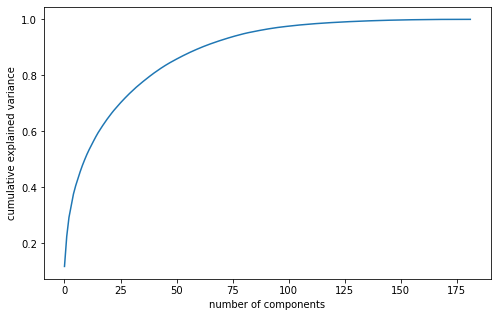

In [ ]:
#Screeplot for the PCA components to select th optimal no of components
%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**Observation:** From the above graph we can see that 90% of the variance in the data is explained by the 60 components. Hence lets do the PCA with 60 components and build the models

In [ ]:
# Initialize pca with 60 components
pca = PCA(n_components=60, random_state=42)
# fit and transform the training dataset
X_train_pca = pca.fit_transform(X_train)
# transform the testing dataset
X_test_pca = pca.transform(X_test)
# fit and transform the whole dataset
X_pca = pca.fit_transform(x_smote)

## BaseLine model building with PCA

In [ ]:
# lets create a list to store the score of each model with PCA
model_score_pca = []

## Building Logistic regression model with PCA

In [ ]:
# Initialize the Logistic regression
model = LogisticRegression(class_weight='balanced', random_state=42)
# fit the pca training data
model.fit(X_train_pca, y_train)
# predict the testing pca data
y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = Model_Evaluate(y_test, y_pred)
# add the model scores to score list
model_score_pca.append({'model_name':'LogisticRegression with PCA', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  87.09
ROC AUC score :  87.09
Precision score :  86.48
Recall score :  87.92


## Building Decision tree classifier with PCA

In [ ]:
# initialize the Decision Tree
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
# fit the pca training data
model.fit(X_train_pca, y_train)
# predict the pca testing data
y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = Model_Evaluate(y_test, y_pred)
# add the model scores to score list
model_score_pca.append({'model_name':'DecisionTreeClassifier with PCA', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  88.81
ROC AUC score :  88.81
Precision score :  86.96
Recall score :  91.31


## Building Random forest classifier with PCA

In [ ]:
# initialize the Decision Tree
model = RandomForestClassifier(class_weight='balanced', random_state=42)
# fit the pca training data
model.fit(X_train_pca, y_train)
# predict the pca testing data
y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = Model_Evaluate(y_test, y_pred)
# add the model scores to score list
model_score_pca.append({'model_name':'RandomForestClassifier with PCA', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  95.12
ROC AUC score :  95.12
Precision score :  94.52
Recall score :  95.81


## Building XGBoost classifier with PCA

In [ ]:
# initialize the Decision Tree
model = XGBClassifier(random_state=42)
# fit the pca training data
model.fit(X_train_pca, y_train)
# predict the pca testing data
y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = Model_Evaluate(y_test, y_pred)
# add the model scores to score list
model_score_pca.append({'model_name':'XGBClassifier with PCA', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

[14:05:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score :  95.25
ROC AUC score :  95.25
Precision score :  93.75
Recall score :  96.95


## Building KNN classifier with PCA

In [ ]:
# initialize the KNeighbors classifiers
model = KNeighborsClassifier()
# fit the pca training data
model.fit(X_train_pca, y_train)
# predict the pca testing data
y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = Model_Evaluate(y_test, y_pred)
# add the model scores to score list
model_score_pca.append({'model_name':'KNeighborsClassifier with PCA', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  89.95
ROC AUC score :  89.95
Precision score :  83.31
Recall score :  99.91


## Building SVC classifier with PCA

In [ ]:
# initialize the SVC rbf kernel
model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
# fit the pca training data
model.fit(X_train_pca, y_train)
# predict the pca testing data
y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = Model_Evaluate(y_test, y_pred)
# add the model scores to score list
model_score_pca.append({'model_name':'SVC_Kernel_rbf', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  95.0
ROC AUC score :  95.0
Precision score :  93.31
Recall score :  96.95


## Lets store the model scores with PCA in dataframe

In [ ]:
# convert the model scores to dataframe
model_score_pca = pd.DataFrame(model_score_pca,columns=['model_name', 'acc_score', 'roc_score','precision_score','recall_score'])

# Order by highest recall score and roc_auc_score
model_score_pca.sort_values(['recall_score','roc_score'], ascending=False)

,model_name,acc_score,roc_score,precision_score,recall_score
4,KNeighborsClassifier with PCA,89.95,89.95,83.31,99.91
3,XGBClassifier with PCA,95.25,95.25,93.75,96.95
5,SVC_Kernel_rbf,95.00,95.00,93.31,96.95
2,RandomForestClassifier with PCA,95.12,95.12,94.52,95.81
1,DecisionTreeClassifier with PCA,88.81,88.81,86.96,91.31
0,LogisticRegression with PCA,87.09,87.09,86.48,87.92


**Observation:**
1. For telecom churn prediction, it is more important to predict the churn customers th an no churn customers. Hence we must consider the model which has maximim recall_score
2. From the above table we can see taht KNeighborsClassifier  classifier has 99.87 % recall rate
3. XGBClassifier is doing good job in overall prediction as it has high score for both recall and precision

## Cross validation and Hyperparameter Tuning

In [ ]:
# lets initialize Stratified KFold
skf = StratifiedKFold(n_splits=4, shuffle = True, random_state = 42)

In [ ]:
# Cross validation for KNeighborsClassifier
knn_model = KNeighborsClassifier()
KNN_score = cross_val_score(knn_model, X_pca, y_smote, scoring='recall', cv = skf, n_jobs=-1)
print('KNeighborsClassifier cv_score_mean : ', round(KNN_score.mean() * 100, 2))
print('KNeighborsClassifier cv_score_std : ', round(KNN_score.std() * 100, 2))

KNeighborsClassifier cv_score_mean :  99.83
KNeighborsClassifier cv_score_std :  0.05


In [ ]:
# Cross validation for XGBClassifier
# initialize the XGBClassifier
xgc_model = XGBClassifier(random_state=42)
xgc_score = cross_val_score(xgc_model, X_pca, y_smote, scoring='recall', cv = skf, n_jobs=-1)
print('XGBClassifier cv_score_mean : ', round(xgc_score.mean() * 100, 2))
print('XGBClassifier cv_score_std : ', round(xgc_score.std() * 100, 2))

XGBClassifier cv_score_mean :  96.61
XGBClassifier cv_score_std :  0.2


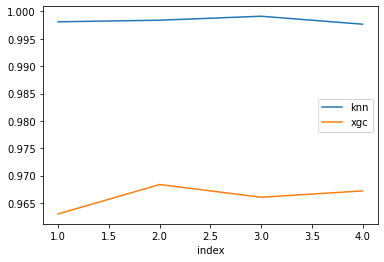

In [ ]:
# lets plot the cross validation curve
# plot the cv scores for the above 2 models
cv_scores_df = pd.DataFrame({'index':np.linspace(1,4,4),'knn':KNN_score,'xgc':xgc_score})
cv_scores_df.plot.line(x='index', y=['knn','xgc'])
plt.show()

**Observation:** From the above graph we can see that CV score of the KNNclassifier seems to be constant,where cv score of the XGClassifier is varying

### Lets select KNeighborsClassifier and do the hyper parameter tuning

In [ ]:
# Hyperparameter Tuning for KNeighborsClassifier
# lets define Number of neighbors
n_neighbors =  [1,2,3]
# lets define Power parameter for the distance metric
p = [1,2,3]

# lets create the parameter grid
params = {'n_neighbors': n_neighbors,'p': p}

# initialize the KNN model
best_model = KNeighborsClassifier(weights='uniform', n_jobs=-1)

# lets initialize the StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 42)


In [ ]:
# lets initialize the RandomSearchCV
grid = RandomizedSearchCV(estimator=best_model, param_distributions=params, n_iter = 1, scoring='recall', n_jobs=-1, cv=skf.split(X_pca,y_smote), verbose=1, random_state=42 )

# fit the whole pca dataset
grid.fit(X_pca, y_smote)

# print the grid results
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits

 Best estimator:
KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

 Best score:
0.9978954664882735

 Best parameters:
{'p': 2, 'n_neighbors': 3}


### Fitting the best estimators and doing predictions

In [ ]:
# Lets initialize the model with the best estimor
best_model = grid.best_estimator_

# fit the pca training dataset
best_model.fit(X_train_pca, y_train)

# Predict the model with the pca testing dataset
y_pred = best_model.predict(X_test_pca)

# get the predict probablities of pca testing dataset
y_pred_proba = best_model.predict_proba(X_test_pca)

## Model evaluation

In [ ]:
# Classification Report
print('\nClassification Report : \n\n', classification_report(y_test, y_pred))

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('\nTN = {0}, FP = {1}, FN = {2}, TP = {3}\n\n'.format(tn, fp, fn, tp))

# Model evaluation
acc_score, roc_score, prec_score, rec_score = Model_Evaluate(y_test, y_pred)


Classification Report : 

               precision    recall  f1-score   support

           0       1.00      0.82      0.90      6890
           1       0.85      1.00      0.92      6890

    accuracy                           0.91     13780
   macro avg       0.92      0.91      0.91     13780
weighted avg       0.92      0.91      0.91     13780


TN = 5668, FP = 1222, FN = 8, TP = 6882


Accuracy Score :  91.07
ROC AUC score :  91.07
Precision score :  84.92
Recall score :  99.88


## ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

**Referrred from Logistic regression model notebooks**

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

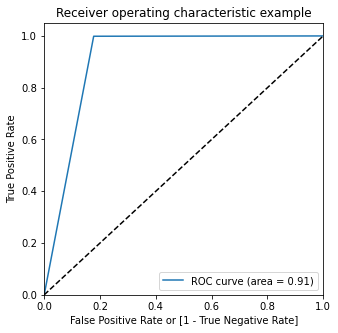

In [ ]:
# ROC-AUC curve
draw_roc(y_test, y_pred)

## Part - 2: Identifying the strong Predictors of Churn
1. Select the top features
2. build the model
3. Do the prediction using top features

## Lets select the best featues that contribute in churn prediction

In [ ]:
# Lets use randomforest classifier to find teh best features
max_features = int(round(np.sqrt(X_train.shape[1])))
print(max_features)

final_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=42, verbose=1)

#lets fit the random forest model on the train data
final_model.fit(X_train, y_train)

13


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   51.2s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=42, verbose=1)

In [ ]:
# lets see the OBB score
final_model.oob_score_

0.9610304789550073

In [ ]:
# Check the feature importance score for each feature
feature_imp = pd.DataFrame({'Feature':X_train.columns, 'Score':final_model.feature_importances_})
# Order the features by max score
feature_imp = feature_imp.sort_values('Score', ascending=False).reset_index()
feature_imp.head(30)

,index,Feature,Score
0,14,roam_og_mou_8,0.034605
1,11,roam_ic_mou_8,0.029455
2,180,fb_user_8_1.0,0.027172
3,59,loc_ic_t2m_mou_8,0.025750
4,80,total_ic_mou_8,0.024934
5,101,last_day_rch_amt_8,0.023414
6,159,total_rech_amt_drop,0.021243
7,65,loc_ic_mou_8,0.020961
8,108,av_rech_amt_data_8,0.019606
9,150,loc_ic_t2m_mou_drop,0.018570


In [ ]:
print("Sum of feature importance=", feature_imp.Score.sum())

Sum of feature importance= 0.9999999999999999


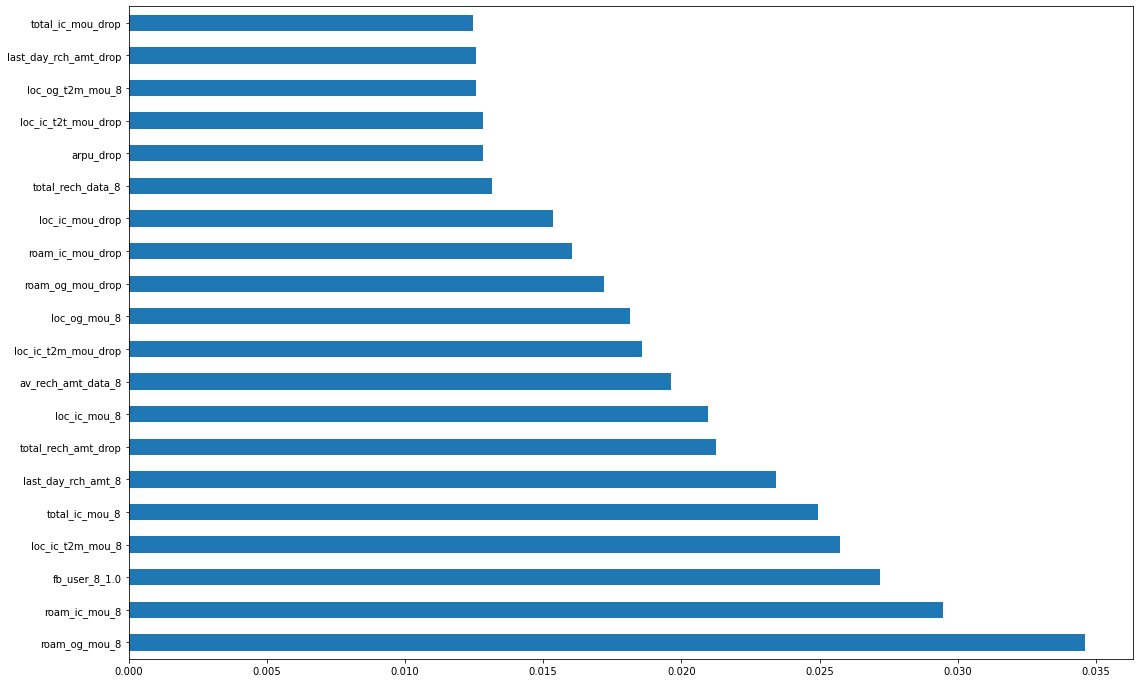

In [ ]:
# plot the chart with top 50 important features
(pd.Series(final_model.feature_importances_, index=X_train.columns)
   .nlargest(20)
   .plot(kind='barh', figsize=(18,12)))

plt.show()

### Prediction on the test data

In [ ]:
# predict churn on test data
y_pred = final_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix is : \n",cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity is : \t", round(sensitivity, 2), "\n", "Specificity is : \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = final_model.predict_proba(X_test)[:, 1]
print("ROC is:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


confusion matrix is : 
 [[6648  242]
 [ 228 6662]]
Sensitivity is : 	0.97
Specificity is : 	0.96
ROC is:    	 0.99


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


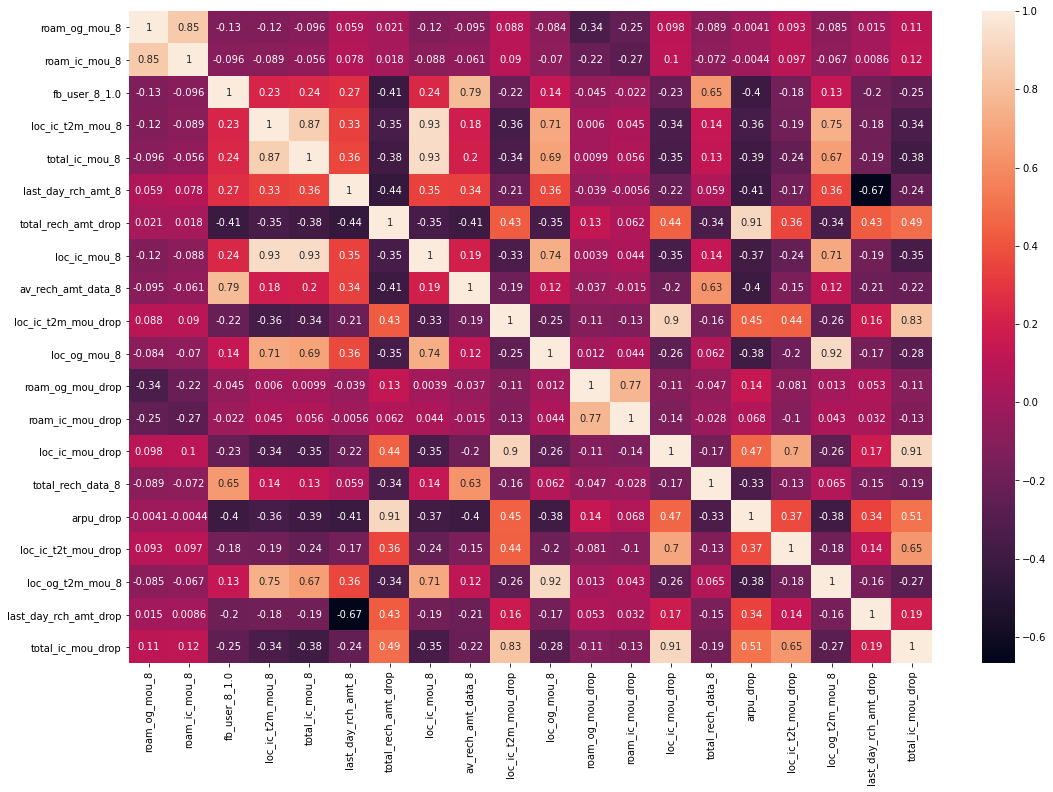

In [ ]:
# lets plot the the heat map to show the correlation of top 50 feature
# Heatmap with top 50 features
top_features = feature_imp[:20]['Feature']
plt.figure(figsize=(18,12))
sns.heatmap(X_train[top_features].corr(), annot=True)
plt.show()

In [ ]:
X_train[top_features].corr()

,roam_og_mou_8,roam_ic_mou_8,fb_user_8_1.0,loc_ic_t2m_mou_8,total_ic_mou_8,last_day_rch_amt_8,total_rech_amt_drop,loc_ic_mou_8,av_rech_amt_data_8,loc_ic_t2m_mou_drop,loc_og_mou_8,roam_og_mou_drop,roam_ic_mou_drop,loc_ic_mou_drop,total_rech_data_8,arpu_drop,loc_ic_t2t_mou_drop,loc_og_t2m_mou_8,last_day_rch_amt_drop,total_ic_mou_drop
roam_og_mou_8,1.000000,0.852713,-0.132364,-0.121230,-0.095934,0.059496,0.021335,-0.122547,-0.094784,0.088307,-0.084305,-0.340865,-0.246046,0.097769,-0.088564,-0.004133,0.093203,-0.085130,0.014866,0.112101
roam_ic_mou_8,0.852713,1.000000,-0.096329,-0.089159,-0.055511,0.078436,0.018142,-0.087953,-0.061087,0.090040,-0.070223,-0.217806,-0.270374,0.103139,-0.071588,-0.004432,0.096673,-0.067340,0.008607,0.115106
fb_user_8_1.0,-0.132364,-0.096329,1.000000,0.229325,0.239685,0.268940,-0.411916,0.240711,0.791474,-0.223693,0.136735,-0.045068,-0.021531,-0.228111,0.653257,-0.399889,-0.176069,0.134357,-0.204455,-0.252209
loc_ic_t2m_mou_8,-0.121230,-0.089159,0.229325,1.000000,0.873166,0.332083,-0.345176,0.934840,0.183707,-0.360785,0.708692,0.006022,0.044861,-0.336047,0.135464,-0.360700,-0.191980,0.748157,-0.180905,-0.339599
total_ic_mou_8,-0.095934,-0.055511,0.239685,0.873166,1.000000,0.359865,-0.375564,0.933502,0.197775,-0.335127,0.691210,0.009879,0.055887,-0.347544,0.132448,-0.393102,-0.240406,0.671375,-0.192010,-0.383876
last_day_rch_amt_8,0.059496,0.078436,0.268940,0.332083,0.359865,1.000000,-0.436011,0.347044,0.338756,-0.210051,0.364110,-0.038853,-0.005556,-0.218555,0.058876,-0.407836,-0.174322,0.355265,-0.667832,-0.242404
total_rech_amt_drop,0.021335,0.018142,-0.411916,-0.345176,-0.375564,-0.436011,1.000000,-0.354972,-0.405273,0.428026,-0.351311,0.131596,0.061760,0.444225,-0.339509,0.911368,0.357393,-0.344395,0.432006,0.487264
loc_ic_mou_8,-0.122547,-0.087953,0.240711,0.934840,0.933502,0.347044,-0.354972,1.000000,0.193368,-0.333873,0.737245,0.003915,0.043846,-0.347241,0.135236,-0.371398,-0.237524,0.713386,-0.189313,-0.349298
av_rech_amt_data_8,-0.094784,-0.061087,0.791474,0.183707,0.197775,0.338756,-0.405273,0.193368,1.000000,-0.192875,0.118333,-0.036684,-0.014988,-0.198998,0.631407,-0.395367,-0.152316,0.117876,-0.207705,-0.218534
loc_ic_t2m_mou_drop,0.088307,0.090040,-0.223693,-0.360785,-0.335127,-0.210051,0.428026,-0.333873,-0.192875,1.000000,-0.252593,-0.111807,-0.130553,0.900724,-0.162241,0.449865,0.443390,-0.258707,0.160599,0.825705


In [ ]:
#selected the uncorrelated features from the top 50 features
cols = ['last_day_rch_amt_drop','arpu_drop','total_rech_amt_drop','loc_ic_t2t_mou_drop','loc_og_mou_8',
        'loc_og_t2m_mou_8','loc_ic_t2t_mou_drop','loc_ic_mou_drop','total_rech_data_8','total_ic_mou_8']

X = X_train[cols]
Y = y_train

# fit the data in GLM model
logm = sm.GLM(Y,(sm.add_constant(X)), family = sm.families.Binomial())
glm_model = logm.fit()
# print the summary results
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41340
Model:                            GLM   Df Residuals:                    41330
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17684.
Date:                Mon, 29 Mar 2021   Deviance:                       35368.
Time:                        14:33:57   Pearson chi2:                 6.10e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2475      0.015    -16.821      0.000      -0.276      -0.219
last_day_rch_amt_drop     0.2782      0.015     18.627      0.000       0.249       0.307
arpu_drop                 0.2275      0.033      6.822      0.000       0.162       0.293
total_rech_amt_drop       0.3919      0.034     11.554      0.000       0.325       0.458
loc_ic_t2t_mou_drop       0.0504      0.011      4.494      0.000       0.028       0.072
loc_og_mou_8             -0.2804      0.042     -6.629      0.000      -0.363      -0.198
loc_og_t2m_mou_8         -0.3200      0.042     -7.531      0.000      -0.403      -0.237
loc_ic_t2t_mou_drop       0.0504      0.011      4.494      0.000       0.028       0.072
loc_ic_mou_drop           0.3484      0.024     14.377      0.000       0.301       0.396
total_rech_data_8        -0.6030      0.017    -35.168      0.000      -0.637      -0.569
total_ic_mou_8           -0.9285      0.028    -33.717      0.000      -0.982      -0.875
=========================================================================================
"""

**Observation:** From the GLM model statistics we can see that P values of the selected top features are "0", Hence teh selected features are significant

## Lets build model on top selected feature

In [ ]:
# Lets try some different model and see the result
top_model = ExtraTreesClassifier(bootstrap=False, class_weight='balanced', criterion='gini', max_depth=60, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1, oob_score=False, random_state=42, verbose=0, warm_start=False)
top_model.fit(X_train, y_train)
y_pred = top_model.predict(X_test)

## Top model evaluation

In [ ]:
# Classification Report
print('\nClassification Report : \n\n', classification_report(y_test, y_pred))

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('\nTN = {0}, FP = {1}, FN = {2}, TP = {3}\n\n'.format(tn, fp, fn, tp))

# Model evaluation
acc_score, roc_score, prec_score, rec_score = Model_Evaluate(y_test, y_pred)


Classification Report : 

               precision    recall  f1-score   support

           0       0.99      0.97      0.98      6890
           1       0.97      0.99      0.98      6890

    accuracy                           0.98     13780
   macro avg       0.98      0.98      0.98     13780
weighted avg       0.98      0.98      0.98     13780


TN = 6673, FP = 217, FN = 82, TP = 6808


Accuracy Score :  97.83
ROC AUC score :  97.83
Precision score :  96.91
Recall score :  98.81


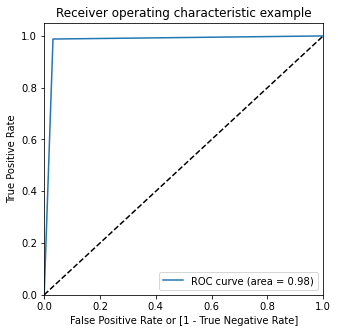

In [ ]:
# Lets plot the ROC curve
draw_roc(y_test, y_pred)

## Business Insights and conclusion

1. We are able to predict about 98 % of the curn customers with accuracy of 97%
2. The top features that will help in identifying churn customers are:
    * last_day_rch_amt_drop
    * arpu_drop
    * total_rech_amt_drop
    * loc_ic_t2t_mou_drop
    * loc_og_mou_8
    * loc_og_t2m_mou_8
    * loc_ic_t2t_mou_drop
    * loc_ic_mou_drop
    * total_rech_data_8
    * total_ic_mou_8
3. The linear function for predicting the churn is:

<b> churn = (-0.2572 + last_day_rch_amt_drop * 0.2763 + arpu_drop* 0.1912 + total_rech_amt_drop* 0.4193 + loc_ic_t2t_mou_drop * 0.0446 + loc_og_mou_8* -0.3113 + loc_og_t2m_mou_8* -0.3411 + loc_ic_t2t_mou_drop* 0.0446 + loc_ic_mou_drop* 0.3873 + total_rech_data_8 * -0.5800 + total_ic_mou_8 *-0.9243) </b>

## Recommandations for the telecom company:
1. If the customer starts reducimg the reacharge amount, data recharge amount and local ongoing/incoming calls, that means he may have high chances of churning out. Hence telecom company should look into such customers and introduce some plans to keep those customers.
2. Telecom company can introsuce some free data packages
3. Telecom company may look into high rate services and lower the cost or give some additional benifits
4. Telecom company can introduce new packages or services to customers who are looking for low price calls or data

## End